In [1]:
# Create the final SUMS catalog
# - I checked for duplicates that we may have introduced by self-matching the step 4 catalogs in topcat. 
# - There are some very close sources (~0.1 arcsec) but they do have different MCPS photometry.
# - There were 4 of these in the SMC and 3 in the LMC.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

# Set dir depending on machine 
data_dir = "/Users/bethany/Library/CloudStorage/OneDrive-Personal/Projects/0_Data/"
df = pd.read_csv(data_dir + '0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Catalog.csv')
cf = pd.read_csv(data_dir + '0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Candidate_Catalog.csv')

# Sources with only one observation
n_obs = ['UVW2_nobs',	'UVM2_nobs',	'UVW1_nobs']
# Per filter
for label in n_obs:
    print(df[df[label] == 1].shape[0],' or ',df[df[label] == 1].shape[0]/df.shape[0]*100, 'percent sources with only 1 observation in', label)
# Any filter
print('Any filter: ', df[(df[n_obs[0]] == 1) | (df[n_obs[1]] == 1) | (df[n_obs[2]] == 1)].shape[0])
print('Any filter: ', df[(df[n_obs[0]] == 1) | (df[n_obs[1]] == 1) | (df[n_obs[2]] == 1)].shape[0] / df.shape[0] * 100,' percent')
# All filters
print('All filters: ', df[(df[n_obs[0]] == 1) & (df[n_obs[1]] == 1) & (df[n_obs[2]] == 1)].shape[0])
print('All filters: ', df[(df[n_obs[0]] == 1) & (df[n_obs[1]] == 1) & (df[n_obs[2]] == 1)].shape[0] / df.shape[0] * 100,' percent')

158527  or  21.572144150862265 percent sources with only 1 observation in UVW2_nobs
142330  or  19.368077847888536 percent sources with only 1 observation in UVM2_nobs
140652  or  19.13973783082427 percent sources with only 1 observation in UVW1_nobs
Any filter:  335413
Any filter:  45.64255670058201  percent
All filters:  14979
All filters:  2.038322476523027  percent


In [ ]:
# Full catalog - If we make nans be zero what is the average?
for label in n_obs:
    uvf_n_obs = df[label].copy()
    uvf_n_obs[np.isnan(uvf_n_obs)] = 0
    print(label, np.mean(uvf_n_obs))

UVW2_nobs 3.0969356443121154
UVM2_nobs 2.2411354948977302
UVW1_nobs 2.7743230426103156


In [ ]:
# Full catalog -  Double check that I don't see anything surprising
colums = df.columns
col = colums[15]
df[col].describe()


count    663422.000000
mean         18.155884
std           1.278697
min           9.050000
25%          17.590000
50%          18.372000
75%          19.011000
max          22.265000
Name: I, dtype: float64

Text(0.5, 1.0, 'Full Catalog')

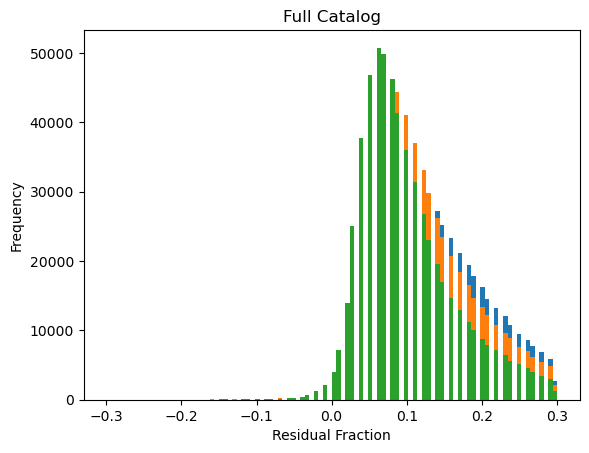

In [4]:
df.UVM2_resid_frac.plot.hist(bins=100)
df.UVW2_resid_frac.plot.hist(bins=100)
df.UVW1_resid_frac.plot.hist(bins=100)
plt.xlabel('Residual Fraction')
plt.title('Full Catalog')

In [5]:
print('N Sources: ', df.shape[0])
print('N Sources LMC: ', df[df.RA>30].shape[0])
print('N Sources SMC: ', df[df.RA<30].shape[0])
print('N Blue Sources: ', cf.shape[0])
print('N Blue Sources LMC: ', cf[cf.RA>30].shape[0])
print('N Blue Sources SMC: ', cf[cf.RA<30].shape[0])

N Sources:  734869
N Sources LMC:  471507
N Sources SMC:  263362
N Blue Sources:  829
N Blue Sources LMC:  528
N Blue Sources SMC:  301
